<a href="https://colab.research.google.com/github/higordevellard/Data_Analysis_and_Visualisation_Energy_Generation/blob/main/Data_Analysis_Energy_Generarion(English).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Generation Analysis


## 1.Motivation

One of the several areas that an electrical engineer can work in is the area of ​​strategic planning in power generation, whether for a private generation company or a state-owned company, where the analyzed data can be from a city, state or the entire country. .

A great challenge that countries face is to be able to know 100% of their energy matrix, to be able to assemble an updated dataset with daily generation data and periodically forecast energy consumption for the coming months and years, and with that, it is possible to determine strategies for operation and infrastructure for an entire territory.


## 2.Packages

In [66]:
# Configuration of packages' warnings
import warnings
warnings.filterwarnings("ignore")

# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler # normalization
from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split #Training and Test 
from sklearn.preprocessing import PolynomialFeatures # Create polynomial features
from sklearn.linear_model import LinearRegression # Create Regression Model.
from sklearn.metrics import mean_squared_error #Calculate Regression Error


## 3.Dataset Load

The dataset chosen for this project is a sample that details energy consumption in the United States of America between the years 2001 - 2022. The study will be important to learn more about the energy matrix of this country.

Too many datasets were included in the study due to the need to analyze the data using other parameters, this need arose during the development of this work and will be discussed further later.

In [67]:
# Dataset Localization
url_1 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte1.csv'
url_2 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumo_energia_eua_parte2.csv'
url_3 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/media_temperatura_eua.csv'
url_4 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/consumidores_eua.csv'
url_5 = 'https://raw.githubusercontent.com/higordevellard/MVP_01/main/pre%C3%A7o_kwh.csv'

# Labels 
labels_atributos = ['ID', 'Year', 'Month', 'State', 'Type_of_production', 'Power_supply', 'Generation(MWh)']
labels_atributos_temperatura = ['Month/Year', 'Temperature(°F)', 'Temperature(°C)']
labels_atributos_consumidores = ['qty_consumers', 'Month/Year']
labels_atributos_preço = ['price(cents/kWh)_residential', 'price(cents/kWh)_commercial', 'price(cents/kWh)_industrial', 'Month/Year']

# Read Dataset
dataset_p1 = pd.read_csv(url_1, names=labels_atributos, header=0, delimiter=',')
dataset_p2 = pd.read_csv(url_2, names=labels_atributos, header=0, delimiter=',')
dataset_temperatura = pd.read_csv(url_3, names=labels_atributos_temperatura, header=0, delimiter=',')
dataset_consumidores = pd.read_csv(url_4, names=labels_atributos_consumidores, header=0, delimiter=',')
dataset_price_kwh = pd.read_csv(url_5, names=labels_atributos_preço, header=0, delimiter=',')

### **3.1.Dataset Information**


* The datasets referring to the variables "url_1" and "url_2" were imported by kaggle at the following address: https://www.kaggle.com/datasets/kevinmorgado/us-energy-generation-2001-2022 , where it was prepared by data provided by the US government at https://www.eia.gov/electricity/

Due to kaggle's limitation for loading datasets, it was considered the division of power generation datasets into two parts.

* the dataset referring to the variable "url_3" contains the average monthly temperature recorded in the USA during the years 2001 to 2022.
Data can be obtained by accessing the address: https://www.ncei.noaa.gov/access/monitoring/products/

* the dataset referring to the variables "url_4" and "url_5" contains the number of energy consumers over time and the average price paid per kWh in the USA, separated by amount paid for residences, commerce and industry.
Data can be obtained by accessing the address: https://www.eia.gov/totalenergy/








## 4.Data Analysis

###4.1General Information - Power Generation Dataset

In [68]:
#Concatenate the two tables that were split due to weight.
dataset = pd.concat([dataset_p1, dataset_p2])

In [69]:
# Shows the dimensions of the dataset (rows and columns)
dataset.shape

(496773, 7)

In [70]:
# Show dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496773 entries, 0 to 246773
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  496773 non-null  int64  
 1   Year                496773 non-null  int64  
 2   Month               496773 non-null  int64  
 3   State               496773 non-null  object 
 4   Type_of_production  496773 non-null  object 
 5   Power_supply        496773 non-null  object 
 6   Generation(MWh)     496773 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 30.3+ MB


**Important observations raised after the results of the function .info():** 

1)All 7 attributes were properly loaded.

2) All 496773 Instances (rows) are non-null (No missings).

3) the "Month" and "Year" columns are in integer type, initially there is no need to change, later a new date type column will be created in the Month/Year format.

4) columns 3, 4 and 5 are in the expected format, as well as column 6 which should return a decimal value for energy generation.


In [71]:
# Check for duplicate rows in the dataset.
print(dataset.duplicated().sum())

0


In [72]:
# Displays the first 10 rows of the dataset
dataset.head(10)

,ID,Year,Month,State,Type_of_production,Power_supply,Generation(MWh)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0
5,5,2001,1,AK,Total Electric Power Industry,Total,590145.0
6,6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,18410.0
7,7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,64883.0
8,8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,305277.0
9,9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,104549.0


**Description of Dataset Attributes and Instances**

**Attributes:** "Year", "Month", "State", "Type_of_production", "Source_of_Energy" and "Generation(MWh)".

**1.** The temporal attributes **"Month"** and **"Year"** present instances from 01/2001 to 05/2022.

**2.** For the attribute **"State"** we have 52 nominal categorical variables, being: 51 US states in their abbreviated form and the attribute "US-TOTAL" which refers to the sum of the generated value of all the states.

**3.** The nominal categorical attribute **"Type_of_production"** is divided into several instances, namely:

*   'Electric Generators, Electric Utilities' and 'Electric Generators, Independent Power Producers'

> **Electric generators** are equipment that convert other forms of energy, such as mechanical, thermal or chemical energy, into electrical energy. These generators are used in a variety of applications, from small portable generators for home use to large power plants that supply electricity to entire cities.

>**Electric utilities** are companies that supply electricity to consumers. They are responsible for the production, transmission and distribution of electrical energy to homes, businesses and industries. Utilities can be public, private or a combination of both. Furthermore, they generally have a monopoly on power distribution in their service area.

>**Independent Power Producers** (IPPs) are companies that produce electricity for sale to other companies or the general public. They are usually private companies that operate in liberalized energy markets and are not controlled by government-regulated utility companies. IPPs can generate electricity using a variety of sources. They can sell the energy they produce directly to other companies or the general public, or they can sell the energy to a middleman who resells it to other companies or the public.

* 'Combined Heat and Power, Electric Power', 'Combined Heat and Power, Commercial Power' and 'Combined Heat and Power, Industrial Power'

>A Combined Heat and Power Generation (CHP) system, also known as cogeneration, simultaneously generates electricity and heat from a single fuel source. The amount of electricity and heat produced can vary depending on the specific CHP system and its application.

Combined Heat and Power instances (CHPs) are divided into three types:

>**Electric Power** refers to the electricity generated by the CHP system that is fed back into the electrical grid. It can be used by residential, commercial and industrial customers that are connected to the network.

>**Commercial power** refers to electricity generated by the CHP system that is used onsite by a commercial customer, such as a hotel, hospital or office building. This electricity can power customer operations such as lighting, computers and other equipment.

>**Industrial power** refers to electricity generated by the CHP system that is used on-site by an industrial customer, such as a manufacturing plant or refinery. This electricity can power the customer's production processes such as motors, pumps and other equipment.

* 'Total Electric Power Industry'

Instance that will return the sum of what was generated by the other categorical attributes described above.

**4.** The nominal categorical attribute **"Power_supply"** will indicate which raw material is used for energy generation.

'Pumped Storage': Not talked about much, but it is energy that is stored by pumping water from a lower reservoir to an upper reservoir during periods of low energy demand. When energy demand is high, water is released from the upper reservoir to generate electricity in a turbine.

'Geothermal' (Geothermal - coming from the Earth's heat).

'Other' - All other existing means of generating energy are grouped in this instance, such as wave energy.

'Total' - Instance representing the union of all energy sources lists.

**5.** **Generation(MWh)** - Quantitative attribute that represents energy generation in MWh which means megawatt-hour, for those unfamiliar with the term, a unit of measurement of electrical energy. One megawatt-hour equals one million watts of power used for one hour. It is a common measure to quantify the amount of electrical energy that is produced or consumed over time. For example, if a power plant produces 100 megawatts of electricity for one hour, this would equal 100 MWh of electrical energy produced.







### **4.2.Data Manipulation For Exploratory Analysis** 

In [73]:
# Energy magnitude conversion.
dataset["Generation(TWh)"] = dataset['Generation(MWh)'] / (10 ** 6)

**Note: Changing the energy generation values ​​from Megawatt.hour to Terawatt.hour was performed for better visualization of the data in the graphs that will be carried out in this study.**

1 kWh = 1.000 Wh

1 MWh = 1.000.000 Wh

1 TWh = 1.000.000.000.000 Wh

In [74]:
# Hide the first index colum
dataset_1 = dataset.drop(['ID', 'Generation(MWh)'], axis=1)

In [75]:
# Checking if the transformation was properly performed
dataset_1.head(10)

,Year,Month,State,Type_of_production,Power_supply,Generation(TWh)
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087
5,2001,1,AK,Total Electric Power Industry,Total,0.590145
6,2001,1,AK,"Electric Generators, Electric Utilities",Coal,0.018410
7,2001,1,AK,"Electric Generators, Electric Utilities",Petroleum,0.064883
8,2001,1,AK,"Electric Generators, Electric Utilities",Natural Gas,0.305277
9,2001,1,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,0.104549


In [76]:
# Creating a new column by concatenating the Month and Year information
dataset_1['Month/Year'] = dataset_1['Month'].astype(str) + '/' + dataset_1['Year'].astype(str)

In [77]:
# Formatting the new column as date
dataset_1['Month/Year'] = pd.to_datetime(dataset_1['Month/Year'], format='%m/%Y')

In [78]:
# Checking if the transformation was properly performed
dataset_1.head()

,Year,Month,State,Type_of_production,Power_supply,Generation(TWh),Month/Year
0,2001,1,AK,Total Electric Power Industry,Coal,0.046903,2001-01-01
1,2001,1,AK,Total Electric Power Industry,Petroleum,0.071085,2001-01-01
2,2001,1,AK,Total Electric Power Industry,Natural Gas,0.367521,2001-01-01
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,0.104549,2001-01-01
4,2001,1,AK,Total Electric Power Industry,Wind,0.000087,2001-01-01


## **5.Visualizations**

####**5.1.Total Generation Energy- USA.**

Opting to start with a specific part of the data, in this part of the work we will only deal with the data that refer to the total generation of energy in the USA.

#####**5.1.1.Data Preparation**

In [79]:
# Filter column "source_de_energia" only records equal to "Total"
dataset_2_0 = dataset_1['Power_supply'] == 'Total'

# State column filter for records equal to "US-TOTAL"
dataset_2_1 = dataset_1['State'] == 'US-TOTAL'

# Filter the column "Type_of_production" to know the sum of what was generated
dataset_2_2 = dataset_1['Type_of_production'] == 'Total Electric Power Industry'

# Save the 03 filters generated in a new variable.
dataset_3 = dataset_1[dataset_2_0 & dataset_2_1 & dataset_2_2]

# Group the Month/Year columns with the state to know the generated value.
dataset_4 = dataset_3.groupby(['Month/Year', 'State'])["Generation(TWh)"].sum().reset_index()

# Verification of the new table.
dataset_4.head()

,Month/Year,State,Generation(TWh)
0,2001-01-01,US-TOTAL,332.493160
1,2001-02-01,US-TOTAL,282.940198
2,2001-03-01,US-TOTAL,300.706544
3,2001-04-01,US-TOTAL,278.078871
4,2001-05-01,US-TOTAL,300.491621


#####**5.1.2.Energy Generation Graph (TWh)**

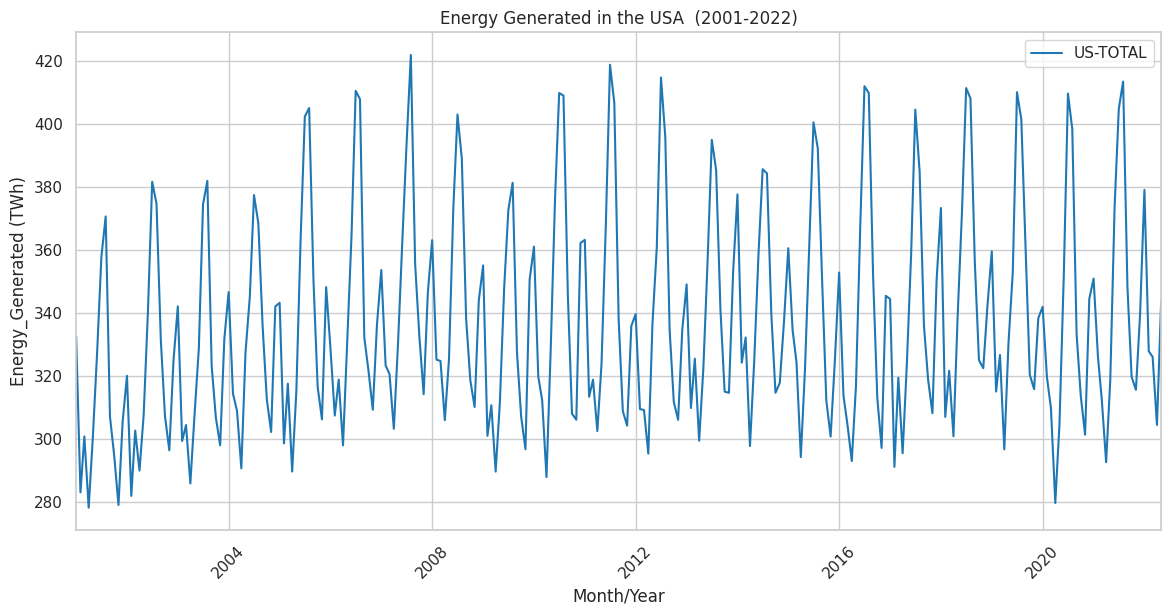

In [80]:
# Defining the dimension for the figure that will be created
fig, ax = plt.subplots(figsize=(14,6))

# The for loop will be used to loop through all the data
for estado in dataset_4['State'].unique():
    df_grafico = dataset_4[dataset_4['State'] == estado]
    ax.plot(df_grafico['Month/Year'], df_grafico["Generation(TWh)"], label=estado)

ax.legend()
ax.set_xlabel('Month/Year')
ax.set_ylabel('Energy_Generated (TWh)')
ax.set_title('Generated Energy in the USA  (2001-2022)')

# Sets the lower limit of the x-axis to the first value obtained
x_min = dataset_4['Month/Year'].min()
x_max = dataset_4['Month/Year'].max()
ax.set_xlim(left=x_min, right=x_max)

plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.05)

The graph of US power generation over the years presents interesting points to note:

* The US had been growing significantly in energy generation since 2001, with a vast growth from 2005 to 2007.
* With the emergence of the 2008 financial crisis, which was a global crisis that began in the US as a result of the real estate collapse and the granting of high-risk mortgage loans, one can see a decrease in energy generation between the years 2008 to 2009. Where in 2010 the US economy began to show signs of recovery and power generation rose again.
* Around 2013, the US faced the "Fiscal Cliff", a fiscal crisis in which the government faced the possibility of a fiscal cliff and the country was still facing a strong wave of unemployment. Thus, there was a decline in power generation between the years 2012 to 2015.
* Another interesting fact can be seen at the beginning of 2020, as a result of the beginning of the Covid-19 pandemic in the USA, where many industries had their activities interrupted or reduced, thus leading to minimum values ​​of energy generation, equivalent to values ​​that were registered in 2001.

To obtain more information about energy generation in the USA over the years, it is necessary to visualize other graphs in which the results can be better visualized.

##### **5.1.3.Descriptive Statistics**

In [81]:
# Dataset statistical summary.
dataset_4.describe().round(2)

,Generation(TWh)
count,257.00
mean,336.67
std,34.21
min,278.08
25%,309.73
50%,327.94
75%,357.61
max,421.80


Considering the 257 records analyzed, the values ​​of (mean, standard deviation, minimum, maximum and quartiles) are presented.

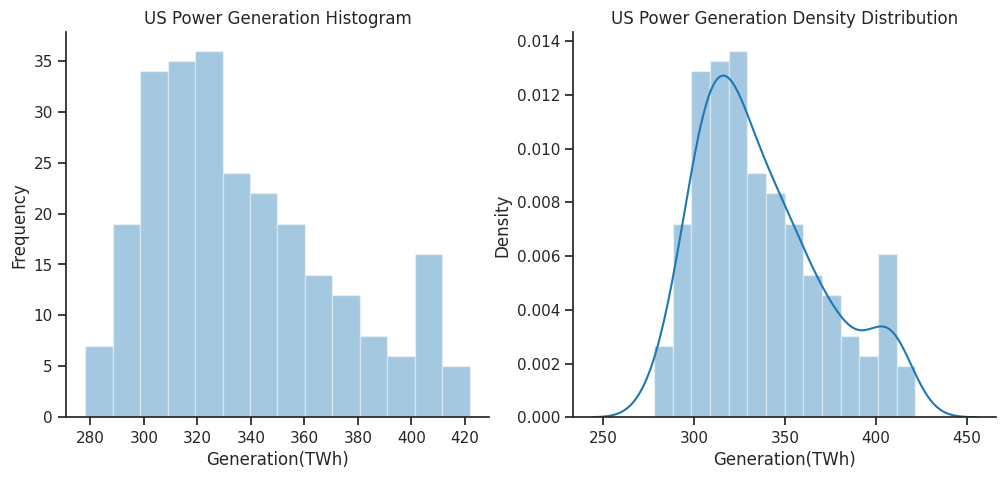

In [82]:
sns.set_style("ticks")

# Create a subplot with two columns
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))


# Plot the first graph in the first subplot
sns.distplot(dataset_4["Generation(TWh)"], kde=False, bins=14, ax=axs[0])
axs[0].set_xlabel("Generation(TWh)")
axs[0].set_ylabel("Frequency")
axs[0].set_title("US Power Generation Histogram")

# Plot the second graph in the second subplot
sns.distplot(dataset_4["Generation(TWh)"], kde=True, bins=14, ax=axs[1])
axs[1].set_xlabel("Generation(TWh)")
axs[1].set_ylabel("Density")
axs[1].set_title("US Power Generation Density Distribution")

sns.despine()
plt.show()

The histogram above presents asymmetry to the right and shows us the frequency of energy generation recorded between the years 2001 to 2022. The most frequent values ​​are around 320 to 330 TWh, with a frequency greater than 35% of the records and the lower frequency around 410 to 420 TWh.

During a year, energy generation has two cycles with two generation peaks, this can be seen in the graph "Energy Generated in the USA (2001-2022)" and will influence the histogram. To improve the analysis, annual charts will be generated to better observe this behavior.

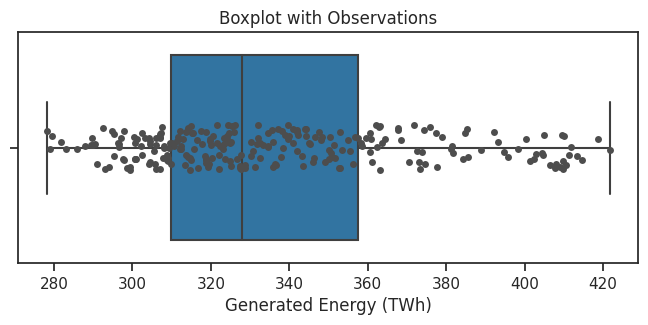

In [83]:
plt.figure(figsize=(8,3)) 

ax_box = sns.boxplot(x="Generation(TWh)", data=dataset_4, orient="h")
ax_box = sns.stripplot(x="Generation(TWh)", data=dataset_4, color=".3", orient="h", size=5)

ax_box.set_title("Boxplot with Observations")
ax_box.set_xlabel("Generated Energy (TWh)")

plt.show()

The Boxplot presented, reinforces some points already presented in the histogram and in the statistical summary made earlier, follows the observations:
* Median(Q2) = 327.94 TWh.
* 1st Quartile(Q1) = 309.73 TWh.
* 3rd Quartile(Q3) = 357.61 TWh.
* There are no outliers.






##### **5.1.4.Graphic of Monthly Energy Generation**

In [84]:
# Group "Month" and "Year" columns with "state".
#
# View power generation values.
dataset_5 = dataset_3.groupby(['Year','Month', 'State'])["Generation(TWh)"].sum().reset_index()

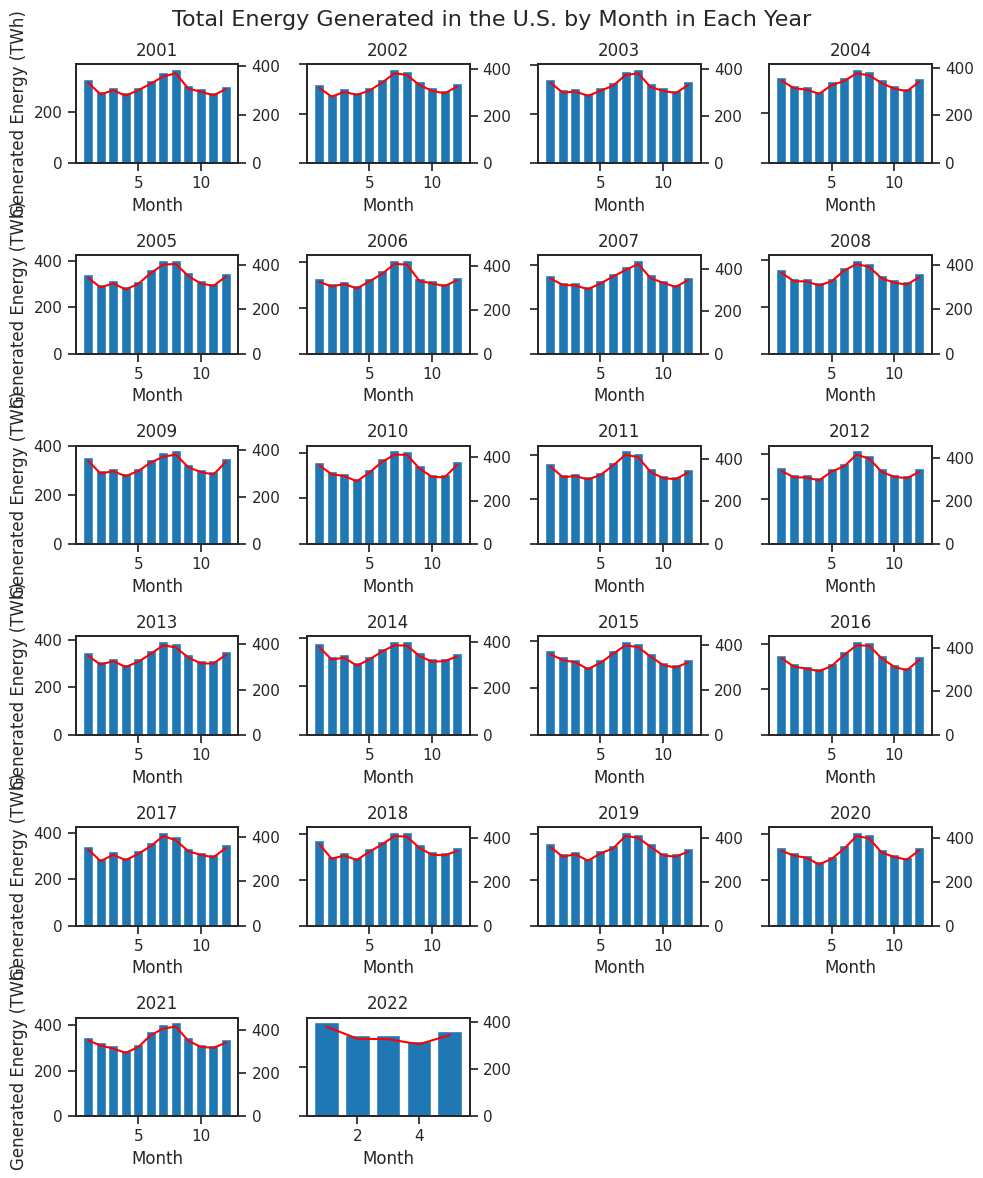

In [85]:
# Defining the dimension for the figure that will be created
fig = plt.figure(figsize=(10, 12))
fig.suptitle('Total Generated Energy in the U.S. by Month in Each Year', fontsize=16)

# The for loop will be used to loop through all the data
for i, ano in enumerate(dataset_5['Year'].unique()):
    dados_ano = dataset_5[dataset_5['Year'] == ano]
    dados_agrupados = dados_ano.groupby('Month')["Generation(TWh)"].sum()
  
    # update subplot index on each iteration
    ax = fig.add_subplot(6, 4, i+1) 
    ax.bar(dados_agrupados.index, dados_agrupados.values)
    ax.set_title(f'{ano}')
    ax.set_xlabel('Month')
    
    # Define the legend only for the graphs of the first column
    if i == 0 or i == 4 or i == 8 or i == 12 or i == 16 or i ==20:
        ax.set_ylabel('Generated Energy (TWh)')
    else:
        ax.set_yticklabels([])
    
    # create a second y-axis and plot the line
    ax2 = ax.twinx()
    ax2.plot(dados_agrupados.index, dados_agrupados.values, color='red')
    ax2.set_ylim(0, dados_agrupados.values.max() * 1.1) # define limites para o eixo y direito
    
plt.tight_layout()
plt.show()

The annual histograms of energy generation in the US prove what had already been surveyed previously. There are two generation cycles during the year. Being the biggest cycle between the months of May to October, presenting the apex of generation between July and August, which corresponds to the vacation period in the USA. The second cycle runs from November to April, peaking between December and January. April and November are the months with the lowest energy generation.

In short, there is an increase in generation during the height of summer in the northern hemisphere, driven by the increased use of refrigeration equipment. The increase in generation during the height of winter, in the northern hemisphere, is due to the consumption of energy used for heating, but it does not reach the same level of energy consumption in the summer.

At that moment, one of the three fundamental pillars for the data scientist comes in, which is the knowledge of the area. A hypothesis that we can raise can be better evaluated if we look for an explanation in the laws of Physics for the phenomenon, since it takes more energy to cool something down than to heat it up. This is because heat transfer always occurs from the hotter to the colder object, according to the second law of thermodynamics. Therefore, to cool an object, it is necessary to remove thermal energy from it and transfer it to an external medium, such as air or water. This heat transfer requires additional energy, which means that it takes more energy to cool something down than it does to heat it up. This effect, observed on a large scale, helps us to understand and hypothesize why more energy is spent in summer than in winter.

After raising the hypothesis of temperature influencing energy generation, it is important to make it clear that I still cannot state that my hypothesis is true, no data presented so far relates temperature to energy generation, nor can I state that temperature it is the only variable that directly affects the variation in energy generation over the months of a year.



**Boxplot for Monthly Generation View**

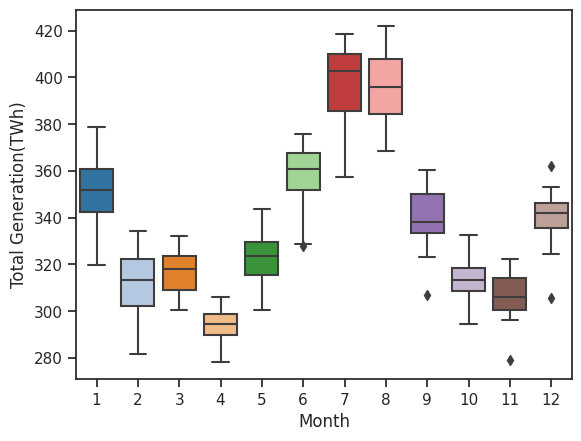

In [86]:
# Create a new dataframe grouped by month and generation value
df_mensal_boxplot = dataset_5.groupby(['Month', "Generation(TWh)"])["Generation(TWh)"].sum().reset_index(name='Total Generation(TWh)')

# Create a boxplot using seaborn
sns.boxplot(x='Month', y='Total Generation(TWh)', data=df_mensal_boxplot)

plt.show()

The monthly boxplot created above will scroll through the monthly values ​​recorded in each year. Already in this configuration we can observe that in the months of June, September, November and December possible "outliers" were registered, however, they are just values ​​much below or much above generation for the months in question but they should not be disregarded.

#### **5.2.Inclusion of New Data**

Being motivated to defend the hypotheses raised in this work so far, I decided to collect data from other datasets to add to the original dataset and analyze whether in fact temperature has a high correlation with energy generation.

With that, the datasets "url_3", "url_4" and "url_5" were added,
which correspond to monthly data on temperature, price of energy generation and number of consumers.

Before loading the new datasets, minor modifications were made to the datasets, using MYSQL, excluding unwanted columns, converting the temperature from °F to °C and adapting the column


##### **5.2.1.Data Preparation**

In [87]:
# Transform 'Month/Year' column to date format
dataset_temperatura['Month/Year'] = pd.to_datetime(dataset_temperatura['Month/Year'], format='%Y/%m')
dataset_price_kwh['Month/Year'] = pd.to_datetime(dataset_price_kwh['Month/Year'], format='%Y/%m')
dataset_consumidores['Month/Year'] = pd.to_datetime(dataset_consumidores['Month/Year'], format='%Y/%m')

# join the datasets based on the "Month/Year" column
dataset_completo = pd.merge(dataset_4, dataset_temperatura, on='Month/Year')
dataset_completo = pd.merge(dataset_completo, dataset_price_kwh, on='Month/Year')
dataset_completo = pd.merge(dataset_completo, dataset_consumidores, on='Month/Year')

#Hide the Temperature(°F) column
dataset_completo = dataset_completo.drop('Temperature(°F)', axis=1)

# display the new combined dataset
dataset_completo.head()

,Month/Year,State,Generation(TWh),Temperature(°C),price(cents/kWh)_residential,price(cents/kWh)_commercial,price(cents/kWh)_industrial,qty_consumers
0,2008-01-01,US-TOTAL,362.998429,-0.96,10.14,9.39,6.33,143412299
1,2008-02-01,US-TOTAL,325.105597,1.50,10.16,9.46,6.34,142816242
2,2008-03-01,US-TOTAL,324.629850,5.48,10.45,9.62,6.46,143198070
3,2008-04-01,US-TOTAL,305.865031,10.22,10.93,9.79,6.64,143118223
4,2008-05-01,US-TOTAL,325.244802,15.20,11.40,10.05,6.75,143167043


##### **5.2.2.General information**

In [88]:
dataset_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month/Year                    173 non-null    datetime64[ns]
 1   State                         173 non-null    object        
 2   Generation(TWh)               173 non-null    float64       
 3   Temperature(°C)               173 non-null    float64       
 4   price(cents/kWh)_residential  173 non-null    float64       
 5   price(cents/kWh)_commercial   173 non-null    float64       
 6   price(cents/kWh)_industrial   173 non-null    float64       
 7   qty_consumers                 173 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 12.2+ KB


It was guaranteed that with the inclusion of new data, no column has a null value.
As the original dataset was filtered to present only US energy generation values ​​and the additional data found for temperature, energy price and number of consumers are from 01/2008 to 05/2022, the number of rows was reduced to 173 records.
The format of the new attributes is correct for decimal numbers, and the number of consumers for integers.

The description of the additional columns follows:

* **Temperature(°C)** - Interval Quantitative data that record the average temperature recorded in the USA in degrees Celcius.
* **Price(kWh)** - Quantitative and Continuous Data - Each energy consumer sector in the US pays a different amount per kWh of energy consumed, for this work, the price for the sectors "residential", "commercial" was considered and "industrial". Values ​​shown are in cents/kWh.
* **qty_consumidores** - Quantitative and continuous data - The column shows the variation in the number of energy consumers over the months.

##### **5.2.3.Descriptive statistics**

In [89]:
# Statistical summary of the new dataset
dataset_completo.describe()

,Generation(TWh),Temperature(°C),price(cents/kWh)_residential,price(cents/kWh)_commercial,price(cents/kWh)_industrial,qty_consumers
count,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02
mean,339.878034,11.836879,12.436994,10.504855,6.884451,1.494544e+08
std,34.234370,8.419890,0.860051,0.493615,0.368659,5.186565e+06
min,279.574150,-1.310000,10.140000,9.390000,6.320000,1.428020e+08
25%,313.292705,4.150000,11.910000,10.170000,6.590000,1.446446e+08
50%,333.249486,11.800000,12.470000,10.490000,6.790000,1.483872e+08
75%,360.455167,20.240000,13.010000,10.780000,7.150000,1.536156e+08
max,418.692524,24.870000,14.970000,12.150000,8.370000,1.607999e+08


**Points Observed:**

* The first question that can be asked is why the statistical summary of generation (TWh) is different from the statistical summary performed previously. The modification of the values ​​is due to, as previously mentioned, there was a decrease in the date range, decreasing to 173 lines instead of 257 (previous value).

* The statistical summary of the new variables incorporated into the dataset was presented. For the "qty_consumers" column, as the number of consumers over the months is in the millions, the values ​​were presented in scientific notation.





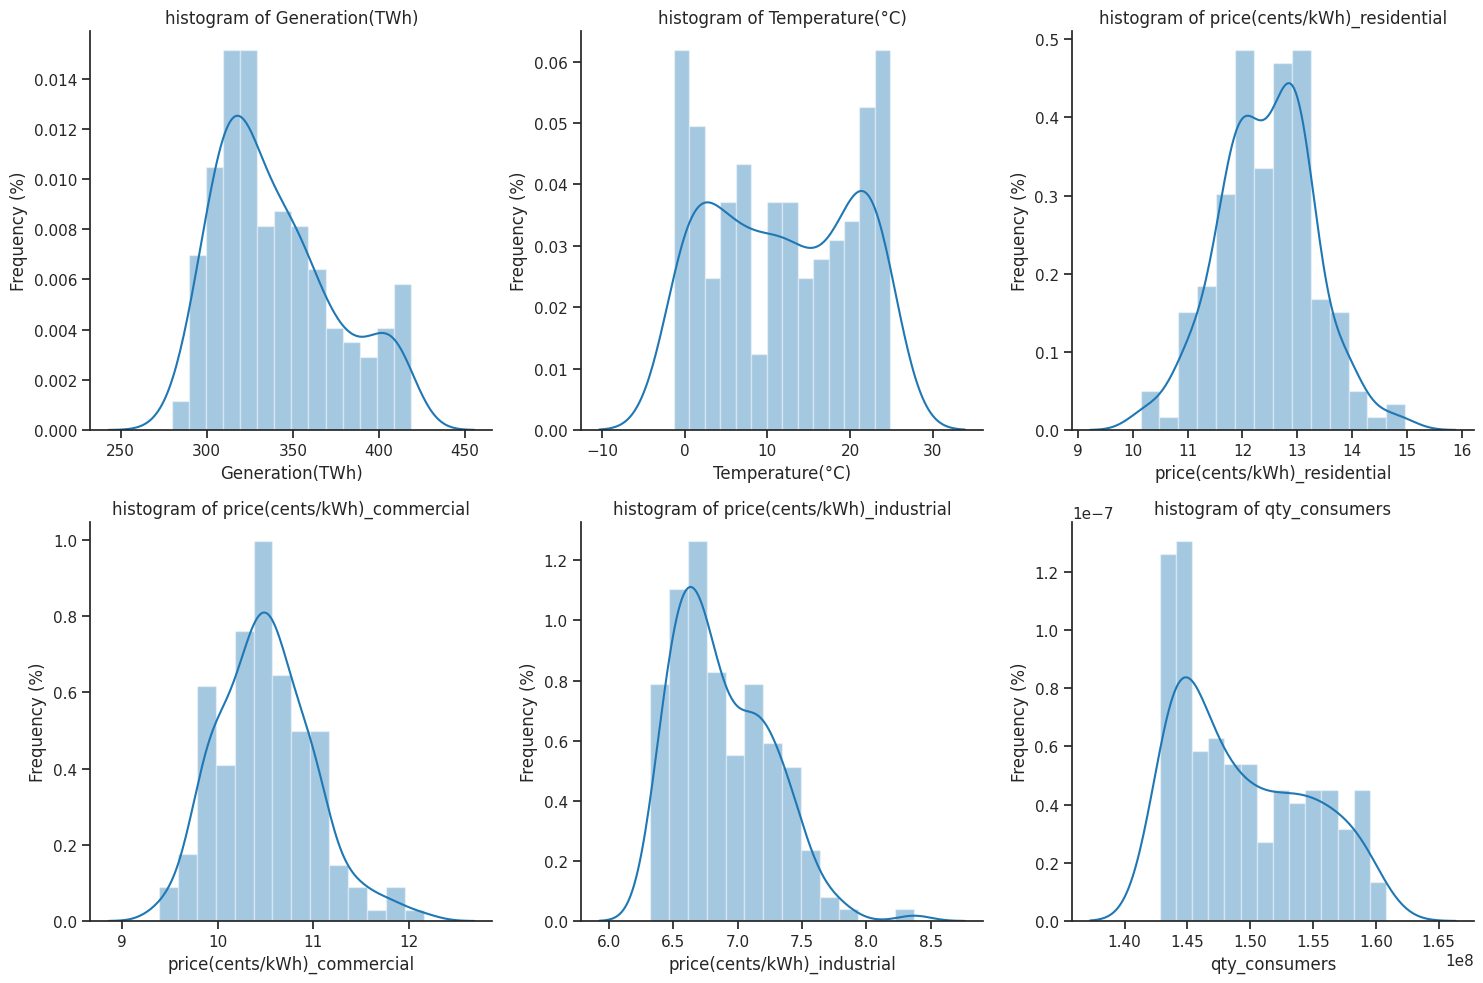

In [90]:
# Creation of histograms for the new attributes.
sns.set_style("ticks")

# Create a subplot with two columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

# List with the columns that will be used for each graph
columns = ["Generation(TWh)", "Temperature(°C)", "price(cents/kWh)_residential",
           "price(cents/kWh)_commercial", "price(cents/kWh)_industrial", "qty_consumers"]

# Loop for para iterar sobre os subplots
for i, ax in enumerate(axs.flatten()):
    # Plotar o gráfico correspondente à coluna
    sns.distplot(dataset_completo[columns[i]], kde=True, bins=14, ax=ax)
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Frequency (%)")
    ax.set_title(f"histogram of {columns[i]}")
    sns.despine()

plt.tight_layout()
plt.show()




The histograms above reveal:

* None of the distributions are considered "normal"
* Changed spawn chart due to line reduction to 173.
* Frequency of temperature records having negative values ​​up to around 25°C.
* It can be seen from the frequency of registrations of prices for energy consumption that the amount paid tends to be higher for the residential category, followed by commercial and, lastly, industrial, being the cheapest.
* The last histogram shows the frequency of the amount of energy consumers in the US.




##### **5.2.4.Numerical Transformations**

Considering that the dataset does not have a normal distribution, it is recommended that only normalization be performed.

For didactic purposes, both standardization and normalization will be performed.

**Separation of Data between Training and Testing**

In [91]:
# Removing non-quantitative columns from standardization
dataset_completo_1 = dataset_completo.drop('Month/Year', axis=1)
dataset_completo_2 = dataset_completo_1.drop('State', axis=1)

# Separating the features (X) from the target (y)
X = dataset_completo_2.drop("Generation(TWh)", axis=1)
y = dataset_completo_2["Generation(TWh)"]

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note: Data partitioning into training and test bases must happen before transforming the entire data set.

**Standardization**

In [92]:
# Create an instance of the StandardScaler class
scaler_p = StandardScaler()

# Adjust the scaler for the dataset
scaler_p.fit(dataset_completo_2)

# Transform the data using the scaler (The result is a matrix)
dataset_padronizado = scaler_p.transform(dataset_completo_2)

# Convert the array to a pandas dataframe
df_padronizado = pd.DataFrame(dataset_padronizado, columns=dataset_completo_2.columns)

# View the standardized dataframe
print(df_padronizado.head())

   Generation(TWh)  Temperature(°C)  price(cents/kWh)_residential  \
0         0.677317        -1.524251                     -2.678518   
1        -0.432762        -1.231237                     -2.655196   
2        -0.446699        -0.757175                     -2.317028   
3        -0.996418        -0.192588                     -1.757302   
4        -0.428683         0.400585                     -1.209236   

   price(cents/kWh)_commercial  price(cents/kWh)_industrial  qty_consumers  
0                    -2.265111                    -1.508331      -1.168338  
1                    -2.122888                    -1.481127      -1.283595  
2                    -1.797808                    -1.154678      -1.209763  
3                    -1.452410                    -0.665005      -1.225203  
4                    -0.924154                    -0.365761      -1.215763  


**Normalization**

In [93]:
# Create an object to normalize the data.
scaler_n = MinMaxScaler()

# Apply data normalization (The result is an array)
dataset_normalizado = scaler_n.fit_transform(df_padronizado)

# Convert the generated array to a pandas dataframe
df_normalizado = pd.DataFrame(dataset_normalizado, columns=df_padronizado.columns)

# View the standardized dataframe
print(df_normalizado.head())


   Generation(TWh)  Temperature(°C)  price(cents/kWh)_residential  \
0         0.599664         0.013369                      0.000000   
1         0.327286         0.107334                      0.004141   
2         0.323866         0.259358                      0.064182   
3         0.188982         0.440413                      0.163561   
4         0.328286         0.630634                      0.260870   

   price(cents/kWh)_commercial  price(cents/kWh)_industrial  qty_consumers  
0                     0.000000                     0.004878       0.033909  
1                     0.025362                     0.009756       0.000791  
2                     0.083333                     0.068293       0.022006  
3                     0.144928                     0.156098       0.017569  
4                     0.239130                     0.209756       0.020282  


Note: for this work, it is not considered necessary to use discretization in any attribute or the "One-hot encoding/dummy encoding" method for creating binary variables.

**Boxplot Charts - Original Dataset**

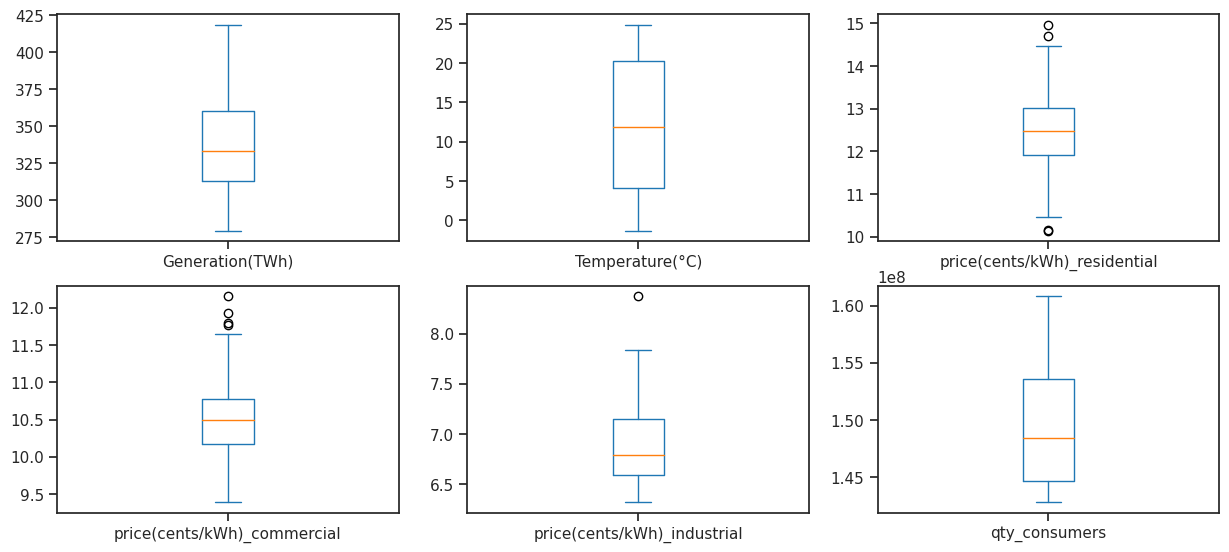

In [94]:
# Creation of Boxplot for the new attributes.
dataset_completo.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Boxplot Charts - Normalized Dataset**

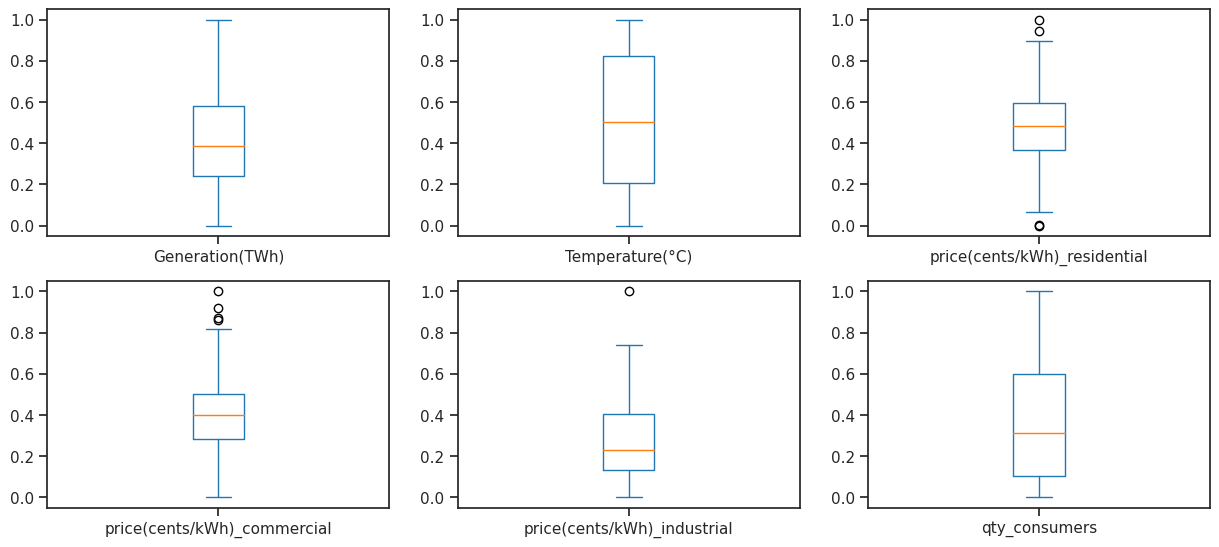

In [95]:
# Creation of Boxplot for the new attributes.
df_normalizado.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

**Notes on the boxplots:**

* The new generation boxplot (TWh) presents some modifications when compared to the previous one (item 5.1.3), as 173 lines are being analyzed in the new analysis.
* A small number of possible outliers were pointed out in the graphs that analyze the price of energy per kWh, but they cannot be discarded as they are amounts that were charged to consumers.
* The dataset graphs with and without normalization show the same behavior, as expected, and the normalized ones are fulfilling their role of transforming the data in the interval from 0 to 1.






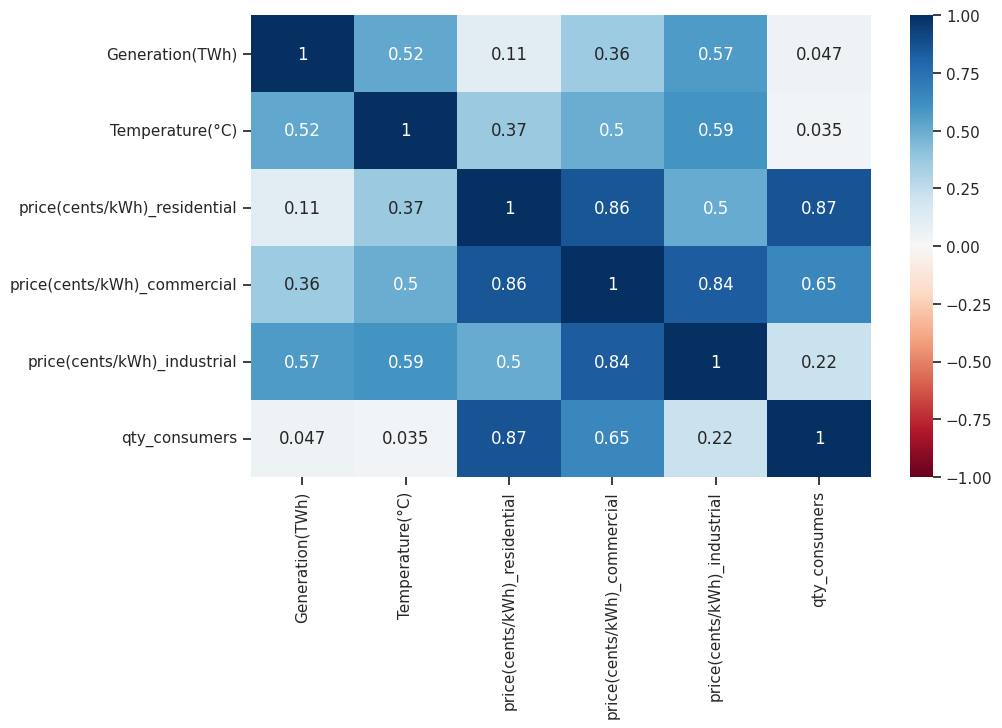

In [96]:
# Correlation Matrix with Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset_completo.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

**Notes on the correlation plot:**

* As previously hypothesized, temperature actually has a high correlation with power generation.
* The price of energy per kWh has a strong correlation with energy generation, when the price of energy in industry is correlated, for the other sectors the correlation decreases.
* The correlation between the number of consumers and energy generation is positive but is not considered a predominant factor.
* There is a high correlation between energy prices with each other, as expected, an increase in energy prices is expected for all categories (Residential, commercial and industrial) as well as in the case of a reduction in energy prices. However, the greatest correlation is between residential and commercial.
* There is also a strong correlation between the number of consumers and the price of residential energy, the hypothesis raised is that, by common sense, the number of residential consumers is the one that increases the most in relation to the others.







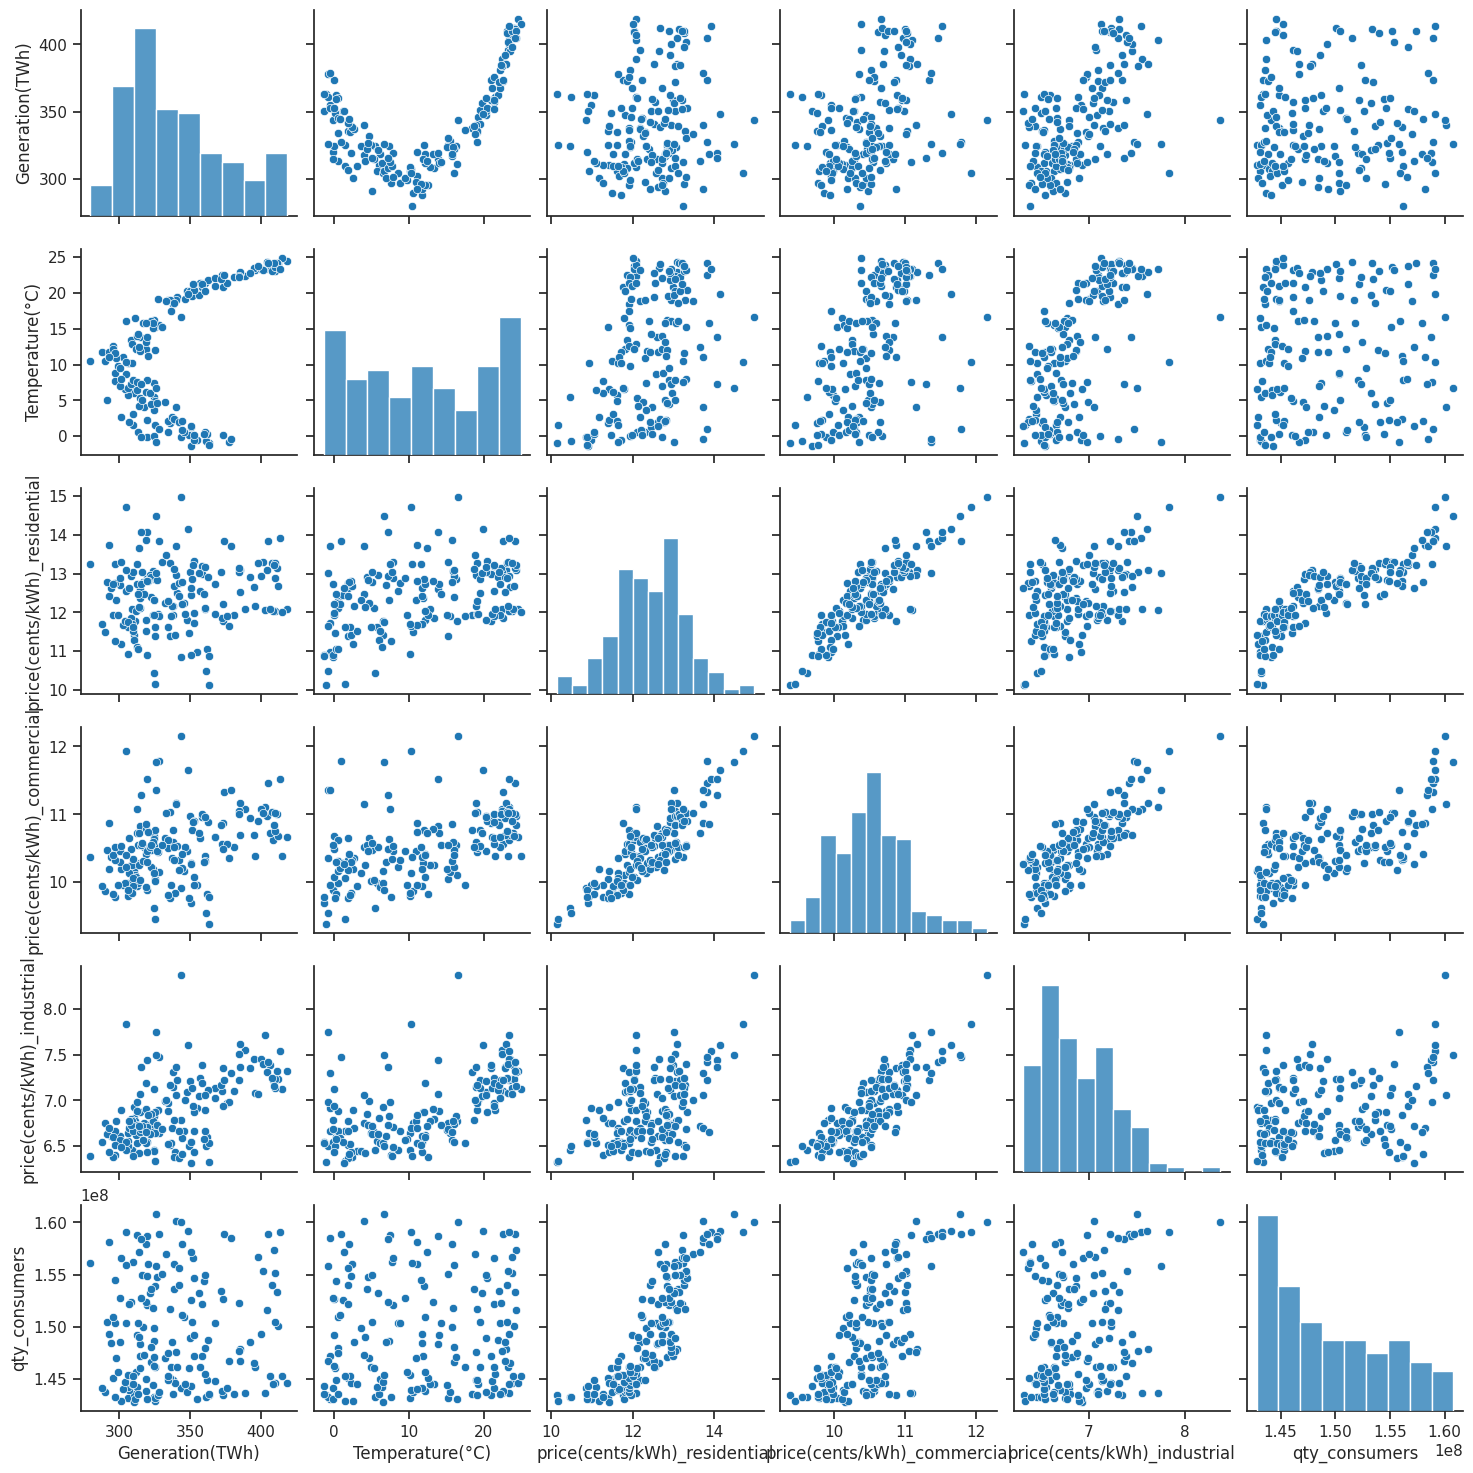

In [97]:
# Creation of Scatter Plot with Seaborn
sns.pairplot(dataset_completo)

The main objective of using the Scatter Plot function at this point in the work is to observe the relationship between energy generation and temperature, where I could observe that there is indeed a relationship, but I will present a better visualization in the next graph so that it is possible to arrive at a conclusion.

##### **5.2.5.Graphs With Correlations**

Text(0.5, 1.2, 'Energy Generation in Time and Temperature Variation and Energy Price')

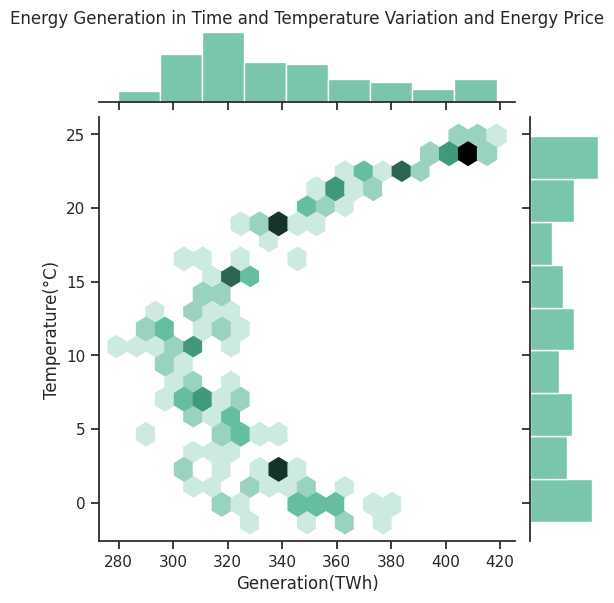

In [98]:
#Criação do gráfico "Hexbin plot" da biblioteca do Seaborn
sns.set_theme(style="ticks")
sns.jointplot(data=dataset_completo, x="Generation(TWh)", y="Temperature(°C)", kind="hex", gridsize=20, color="#4CB391")
#Titulo do gráfico
plt.title("Energy Generation in Time and Temperature Variation and Energy Price", y=1.2)

**Graph Observations**

* Finally, it was possible to obtain a better visualization of the relationship between temperature and energy generation.
It was previously hypothesized that there are two cycles of energy generation in the USA, where in the first cycle there is an increase in generation in the summer and the second cycle there is an increase in energy generation during the winter, the graph above helps to defend the hypothesis.

* The graph shows the generation histogram on the x axis, the temperature histogram on the y axis and the hexagons shown show the relationship between the two variables, the darker the hexagon, the greater the number of points in this region of the graph.
With this, it can be stated that at high temperatures, normally registered in the summer of the northern hemisphere, there will be peaks of energy generation to supply the demand necessary for cooling, when the temperature is milder, around 10°C, the lowest will be registered. generation values ​​and when registering temperatures around 0°C, energy generation grows again to supply the demand necessary for heating.

* The "lying U" shape of the graph also serves to prove the hypothesis that more energy is spent to cool than to heat an environment. the physical explanation was raised earlier to try to explain the phenomenon.


Text(0.5, 1.0, 'Energy Generation in Time and Temperature Variation and Energy Price')

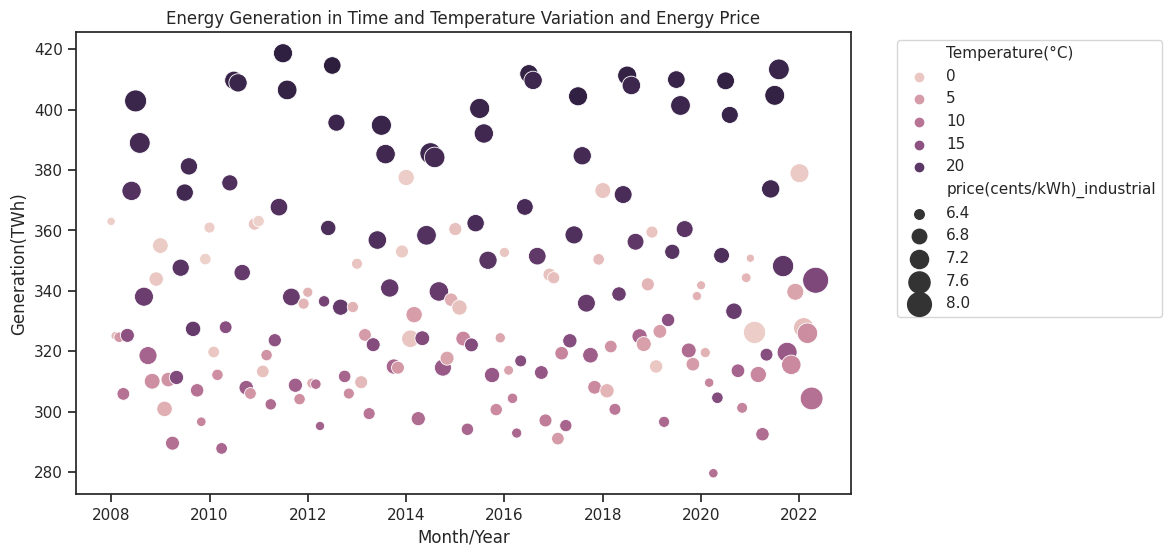

In [99]:
# chart size
plt.figure(figsize=(10,6))

#Defining the parameters of the chosen graph
sns.scatterplot(x="Month/Year", y="Generation(TWh)", hue="Temperature(°C)", size="price(cents/kWh)_industrial", sizes=(35, 350), \
                data=dataset_completo)

# Moving the caption box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Chart title
plt.title("Energy Generation in Time and Temperature Variation and Energy Price")

**Motivation and Observations About the Graph**

After inserting new data in the dataset and observing the correlation between the attributes, I decided to generate a graph that lists the attributes that have a high correlation in order to be able to check it visually.

The graph manages to relate three quantitative data and one temporal and shows us the following points:

* The higher the temperature, the higher the price paid for the energy consumed industrially, represented by circles and large dark circles, which also correspond to times when the energy generated has its highest values.

* A little below the larger and darker circles will be found the lighter circles, which correspond to the minimum recorded temperatures. During this period there will also be a high generation of energy, but the amount charged for energy consumption in the industrial sector has lower values.

* For milder temperatures, around 10°C, the price of consumed energy also shows low values.

* It is important to note that the years 2021 and mid-2022 show a behavior that differs from other years, showing a considerable increase in energy prices for different temperature ranges. Several factors may be responsible for this behavior, including economic factors such as the increase in interest rates, which may have a direct influence, affecting the increase in the price of generation costs, among other factors.





**Regression Chart**

Text(0.5, 1.0, 'Polynomial Regression Chart')

<Figure size 1400x1000 with 0 Axes>

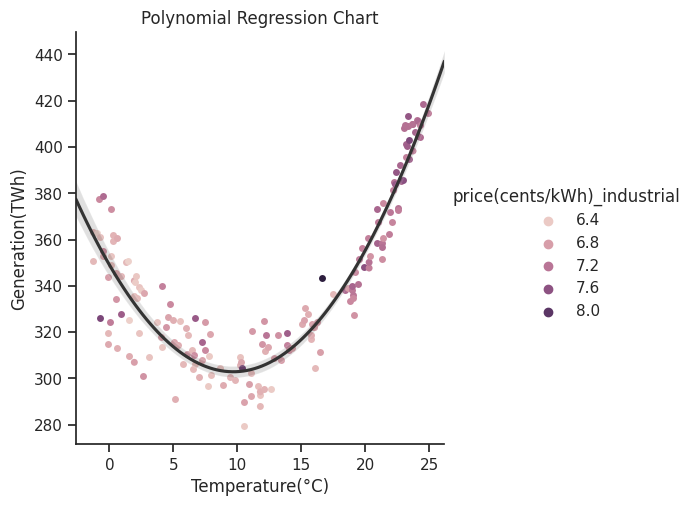

In [100]:
plt.figure(figsize=(14,10))

# Defining the graph inputs
sns.catplot(
    data=dataset_completo, x="Temperature(°C)", y="Generation(TWh)", hue="price(cents/kWh)_industrial", 
    native_scale=True, zorder=1
)
sns.regplot(
    data=dataset_completo, x="Temperature(°C)", y="Generation(TWh)",
    scatter=False, truncate=False, order=2, color=".2",
)

# chart title
plt.title("Polynomial Regression Chart")

**Motivation and Observations About the Graph**

* One of the objectives of working with **supervised learning** is to be able to solve a classification and regression problem. For this work it would be interesting to determine the regression, since we are interested in determining the energy generation value relating to other variables.

* The regression line seen in the graph is a line that represents the relationship between temperature and electrical power generation in terawatt-hours (TWh), along with points referring to the price of energy for the industrial sector. The line is obtained through a polynomial regression fit to the data, which can be second order, as indicated in the image.

In the next item, the error of the plotted regression line will be determined.








**Find the Regression Line Error**

In [101]:
# Defining the independent and dependent variables
x = dataset_completo['Temperature(°C)'].values.reshape(-1,1)
y = dataset_completo["Generation(TWh)"].values

# Defining the degree of the polynomial (As seen in the graph)
grau = 2

# Creating the polynomial features
poly = PolynomialFeatures(grau)
x_poly = poly.fit_transform(x)

# Fitting the regression model
model = LinearRegression()
model.fit(x_poly, y)

# Calculating the regression error
y_pred = model.predict(x_poly)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse).round(2)
print(f"Regression error: {rmse}")

Regression error: 11.52


With this, I can state that the degree 2 polynomial regression line found in the last graph is 11.52 more or less.

###**5.3.Generation by Power Source - USA**

The second part of this work will analyze the type of energy source used for power generation in the USA.

####**5.3.1. Data Preparation**

In [102]:
# Filter removing "total" records from the "Energy Source" column
dt_fonte_energia_1 = dataset_1['Power_supply'] != 'Total'

# Filter the State column to "US-Total"
dt_fonte_energia_2 = dataset_1['State'] == 'US-TOTAL'

# Filter column "Type of production" for "Total Electric Power Industry"
dt_fonte_energia_3 = dataset_1['Type_of_production'] == 'Total Electric Power Industry'

# Merge the previously performed filters into a single variable
dt_fonte_energia_4 = dataset_1[dt_fonte_energia_1 & dt_fonte_energia_2 & dt_fonte_energia_3]

####**5.3.2. Generation Chart by Energy Source**

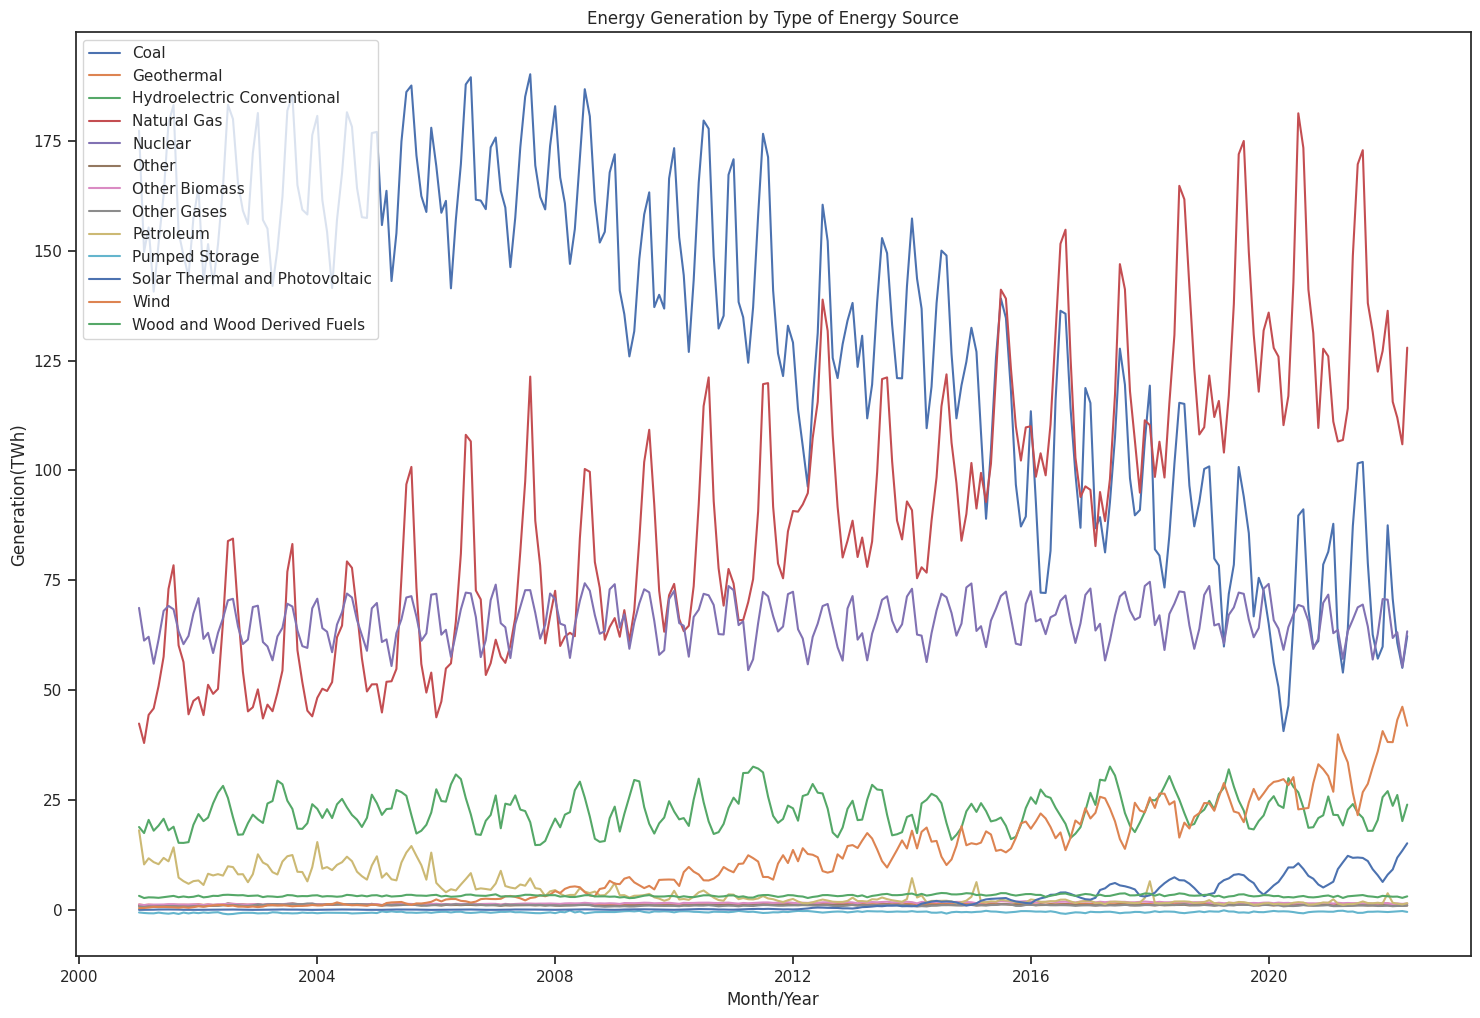

In [103]:
fig, ax = plt.subplots(figsize=(18, 12))

for source, data in dt_fonte_energia_4.groupby('Power_supply'):
    ax.plot(data['Month/Year'], data["Generation(TWh)"], label=source)

ax.set_xlabel('Month/Year')
ax.set_ylabel("Generation(TWh)")
ax.legend(loc='upper left')
ax.set_title("Energy Generation by Type of Energy Source")

plt.show()

**Notes on the chart:**

* It can be seen that in the early 2000s the source of energy used on a large scale for power generation in the US was coal (Coal), which over the years has been decreasing its participation in the US energy matrix, mainly due to incentive laws to replace fossil fuels with renewable sources.
* Around 2016, it can be seen that natural gas (Natural Gas) became the main source of energy in the USA.
* Energy generated by nuclear energy maintained its level, not showing significant growth but remains the third largest source of energy in the USA, but without expectations of growth due to safety issues and the high cost of creating the plant and treating radioactive waste .
* It is important to highlight the growth of wind and solar energy, which has shown an acceleration in growth, especially in recent years, and may have a greater emphasis in the coming years.
* The energy generated by hydroelectric plants (Hydroelectric Conventional), remained at the same level, this is due to the fact that there is a very low availability of new possible sites for the installation of a plant, as well as environmental protection laws and the high cost for the installation of new plants.







###**5.4.Geração por Estado**

Tópico dedicado a analisar o comportamento dos Estados dos EUA na geração de energia. 

####**5.4.1. Data Preparation**

In [104]:
# Select rows from column "State" that are not equal to "US-TOTAL"
dataset_estados_1 = dataset_1[dataset_1["State"]!='US-TOTAL']

# Filter on two columns
dataset_estados_2 = dataset_estados_1[(dataset_estados_1["Type_of_production"]!="Total Electric Power Industry") & \
                                      (dataset_estados_1["Power_supply"]!="Total")]

# Grouping the sum of generation by state and energy source.
dataset_estados_3 = dataset_estados_2.groupby(by=["Power_supply","State"]).sum()["Generation(TWh)"].reset_index()

# Check if the table is as expected
dataset_estados_3.head()


,Power_supply,State,Generation(TWh)
0,Coal,AK,13.575793
1,Coal,AL,1144.623786
2,Coal,AR,542.084089
3,Coal,AZ,759.333144
4,Coal,CA,29.303358


####**5.4.2. Graph of the Quantity of Energy Generated by State and Source of Energy**

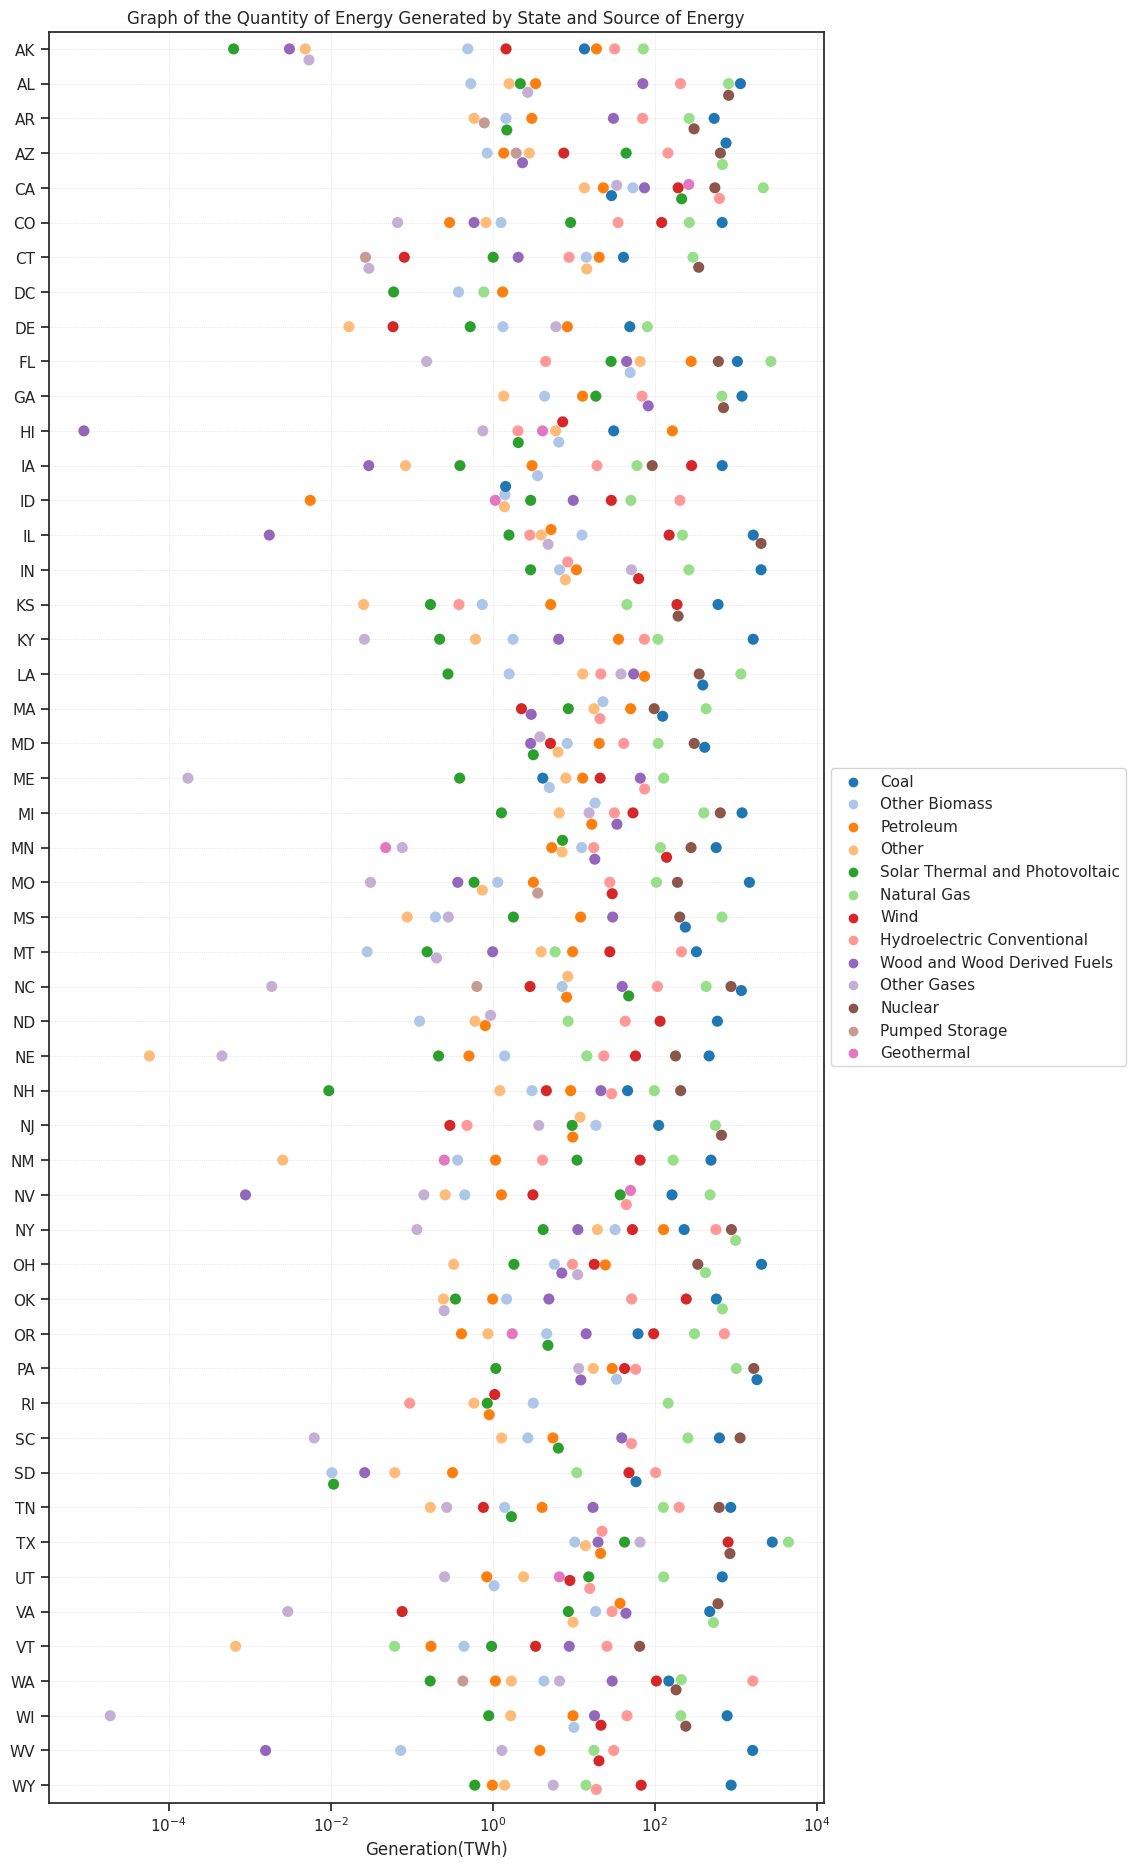

In [105]:
# Sort the dataframe by state name in alphabetical order
dataset_estados_3 = dataset_estados_3.sort_values(by="State")

# chart size
fig, ax = plt.subplots(figsize=(10,23))

# Defining the graph inputs
sns.set_theme(style="whitegrid", palette="tab20")
ax = sns.swarmplot(data=dataset_estados_3, x="Generation(TWh)", y="State", hue="Power_supply", size=8)
ax.set(ylabel="")

# add grid
ax.grid(True, color='lightgray', linewidth=0.5, linestyle='dotted')

# Definition of logarithmic scale
ax.set_xscale('log')

# Graph Title
ax.set_title("Graph of the Quantity of Energy Generated by State and Source of Energy")

# Move the legend to the right of the graph.
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Notes on graphic choice:**

* The graph above aims to verify by state which type of power generation predominates in the region.
* The generation values ​​correspond to the total sum of energy generated from 2001 to mid-2022.
* To facilitate the visualization of the graph, the logarithmic scale was used on the x axis and the states are ordered in alphabetical order on the y axis.

**Results obtained:**

* In the last interval of the x-axis, with values ​​from 100 to 10,000 TWh, it is possible to observe which types of energy generation stand out the most for each US State. Where there is a predominance of Coal (Coal) and Natural Gas (Natural Gas) and nuclear energy (Nuclear).

* Texas, represented by the acronym "TX", California "CA", Florida "FL" and Pennsylvania "PA", are states that stand out for having tall generations for different types of generation. The District of Columbia "DC" is the one with the lowest energy generation during the analyzed time interval.

##**6.Conclusions**

* In a real machine learning model that had the energy generated in a country as a target attribute, it would be necessary to have a **supervised model** with a series of predictive attributes such as the climatic conditions of a region (incidence of sunlight, wind, rain), availability of natural resources (eg Coal, water), energy demand of entire cities, price for each type of energy generation, even political changes can interfere with energy generation. Having this data in hand, in addition to others not mentioned in this study, the model would learn the relationship between the expected inputs and outputs and then make its predictions.
* Based on the supervised model presented, it was possible to obtain a second-degree polynomial regression curve, allowing to visualize the general trend of the data and could be used to make predictions or extract information about the relationship between the variables, however, it would not be possible to construct a reliable model for predicting energy generation with the model presented due to the complexity of the energy market, as previously explained, however, for the purposes of descriptive and diagnostic analysis of the data, the datasets are quite reliable and present very interesting views.
* About using the dataset. Having 03 datasets available for analysis (Original, Standardized and Normalized), the recommendation would be to use the normalized dataset due to the data not having a normal distribution. However, one of the reasons for using normalized data would be to improve the visualization of graphs, compare data that have different scales or units of measurement, in addition to helping to highlight patterns, reducing very outliers. As the original dataset did not have a large amount of outliers, patterns were identified. It was decided to use data with absolute values, that is, which present the real values ​​of each instance.
* The first dataset analyzed in this study presented only the energy generation value as a quantitative attribute, being divided by a series of attributes such as temporal data, states, type of production and energy source. After viewing the monthly generation histogram, it was evident that the generation value was showing a pattern of behavior annually. With this, hypotheses were raised and more data were included in the dataset to observe the possible correlation between the energy generated and the temperature. In fact, temperature influences energy generation, especially in the summer and winter months. In addition to observing the correlation of other attributes such as energy price and number of consumers.
* A very interesting analysis was also to observe the evolution of the types of energy generation in the USA, in the chosen range of a little over 20 years it was possible to observe that coal, which was the predominant source of energy over the years, has been decreasing its participation and giving way to natural gas. And in recent years there has been a leap in renewable energy sources, which deserve attention for the coming years.
* A suggestion for further work would be to obtain a dataset with daily values ​​of energy generation, temperature in each region, as well as the value of energy and growth of consumers by state instead of working with a monthly average value, so we would have even more data reliable, however, I could not find datasets available for these data.
* Other analyzes that could also be carried out in this work would be to find relationships between the types of production, verify how the US cogeneration system behaves over the years, among other analyzes that could be carried out with these categorical attributes.











